In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv', names=["Sex", "Length [mm]", "Diameter [mm]", "Height [mm]", 
                                               "Whole weight [g]", "Shucked weight [g]", "Viscera weight [g]", 
                                               "Shell weight [g]", "Rings"])

Zad1

In [3]:
sex_counts = data['Sex'].value_counts()
sex_distribution = pd.DataFrame(columns=['count', '%'], index=['Male', 'Infant', 'Female'])
sex_distribution['count']['Male'] = sex_counts['M']
sex_distribution['count']['Infant'] = sex_counts['I']
sex_distribution['count']['Female'] = sex_counts['F']

sex_distribution['%']['Male'] = (sex_distribution['count']['Male'] / len(data) * 100).round(2)
sex_distribution['%']['Infant'] = (sex_distribution['count']['Infant'] / len(data) * 100).round(2)
sex_distribution['%']['Female'] = (sex_distribution['count']['Female'] / len(data) * 100).round(2)

sex_distribution

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


Zad2

In [4]:
summary_stats = data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].transpose()
summary_stats

,mean,std,min,25%,50%,75%,max
Length [mm],0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter [mm],0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height [mm],0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight [g],0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight [g],0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight [g],0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight [g],0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


Zad3

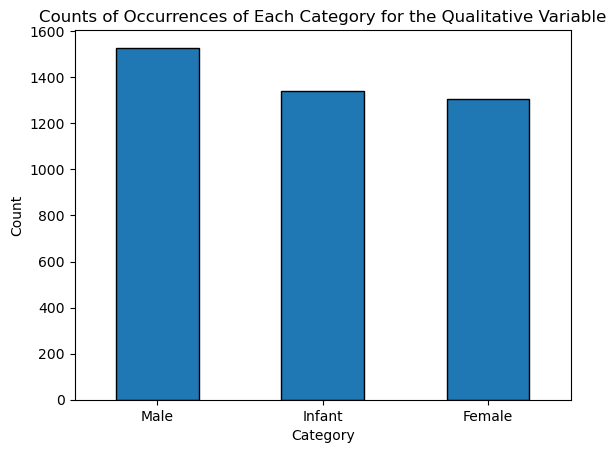

In [5]:

sex_counts = data['Sex'].value_counts()
sex_counts = sex_counts.rename({'M': 'Male', 'F': 'Female', 'I': 'Infant'})
sex_counts.plot(kind='bar', rot=0, edgecolor = 'black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Occurrences of Each Category for the Qualitative Variable')
plt.show()

Zad4

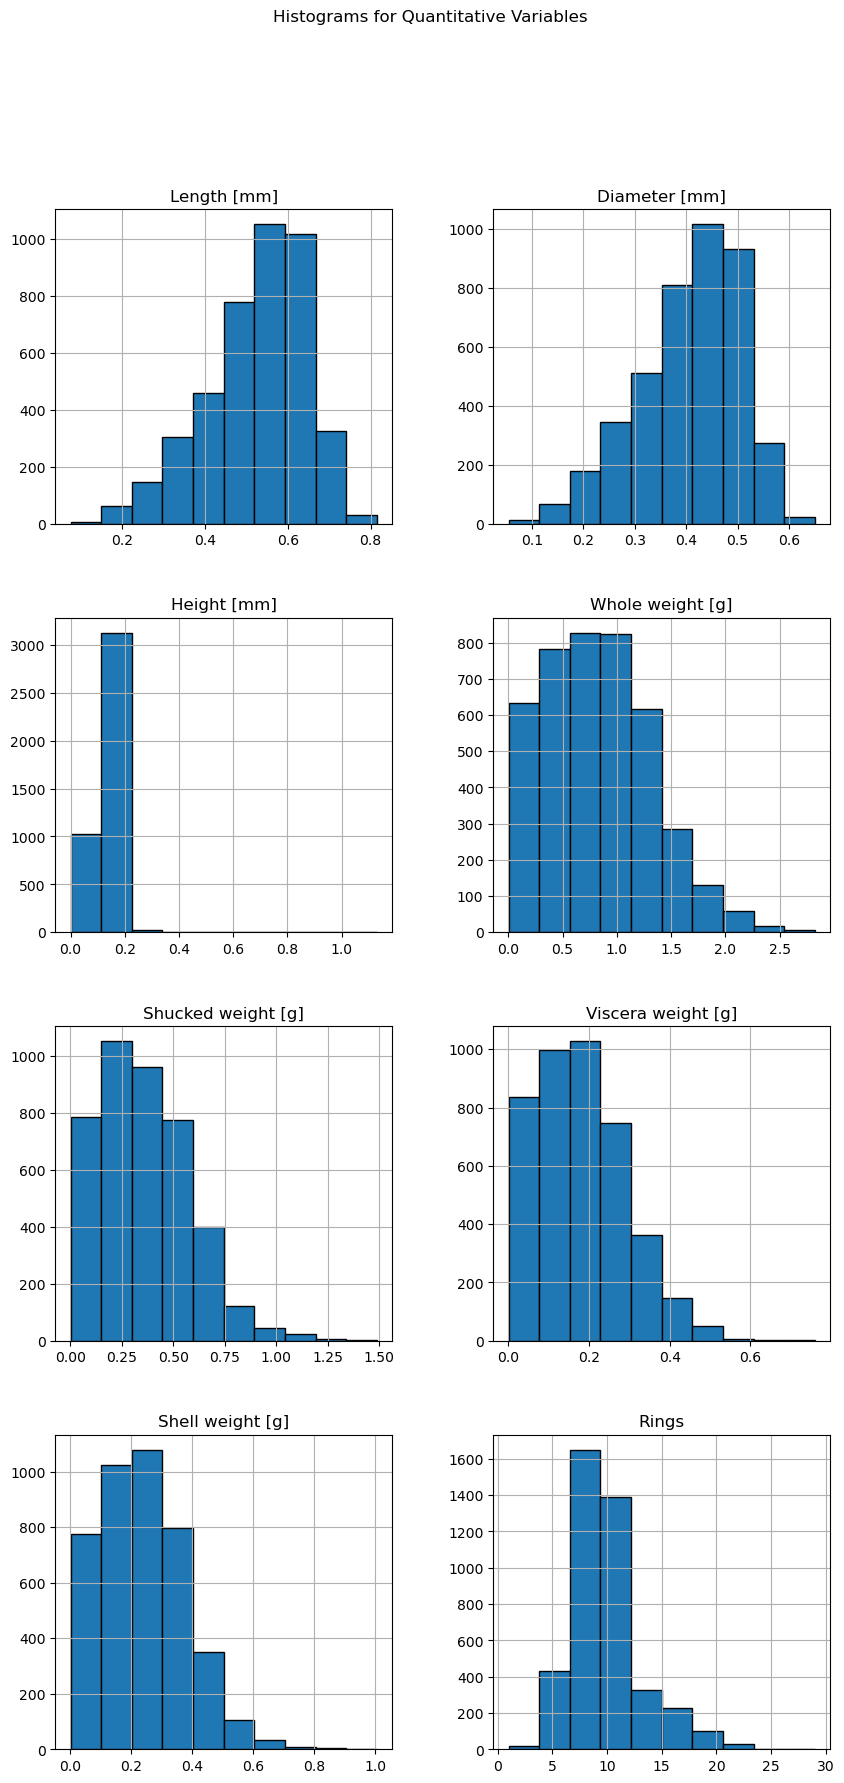

In [6]:
data.drop('Sex', axis=1).hist(bins=10, layout=(4, 2), figsize=(10, 20), edgecolor = 'black')
plt.suptitle('Histograms for Quantitative Variables')
plt.show()

Zad5

Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-package

Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
Z:\Anaconda\Lib\site-package

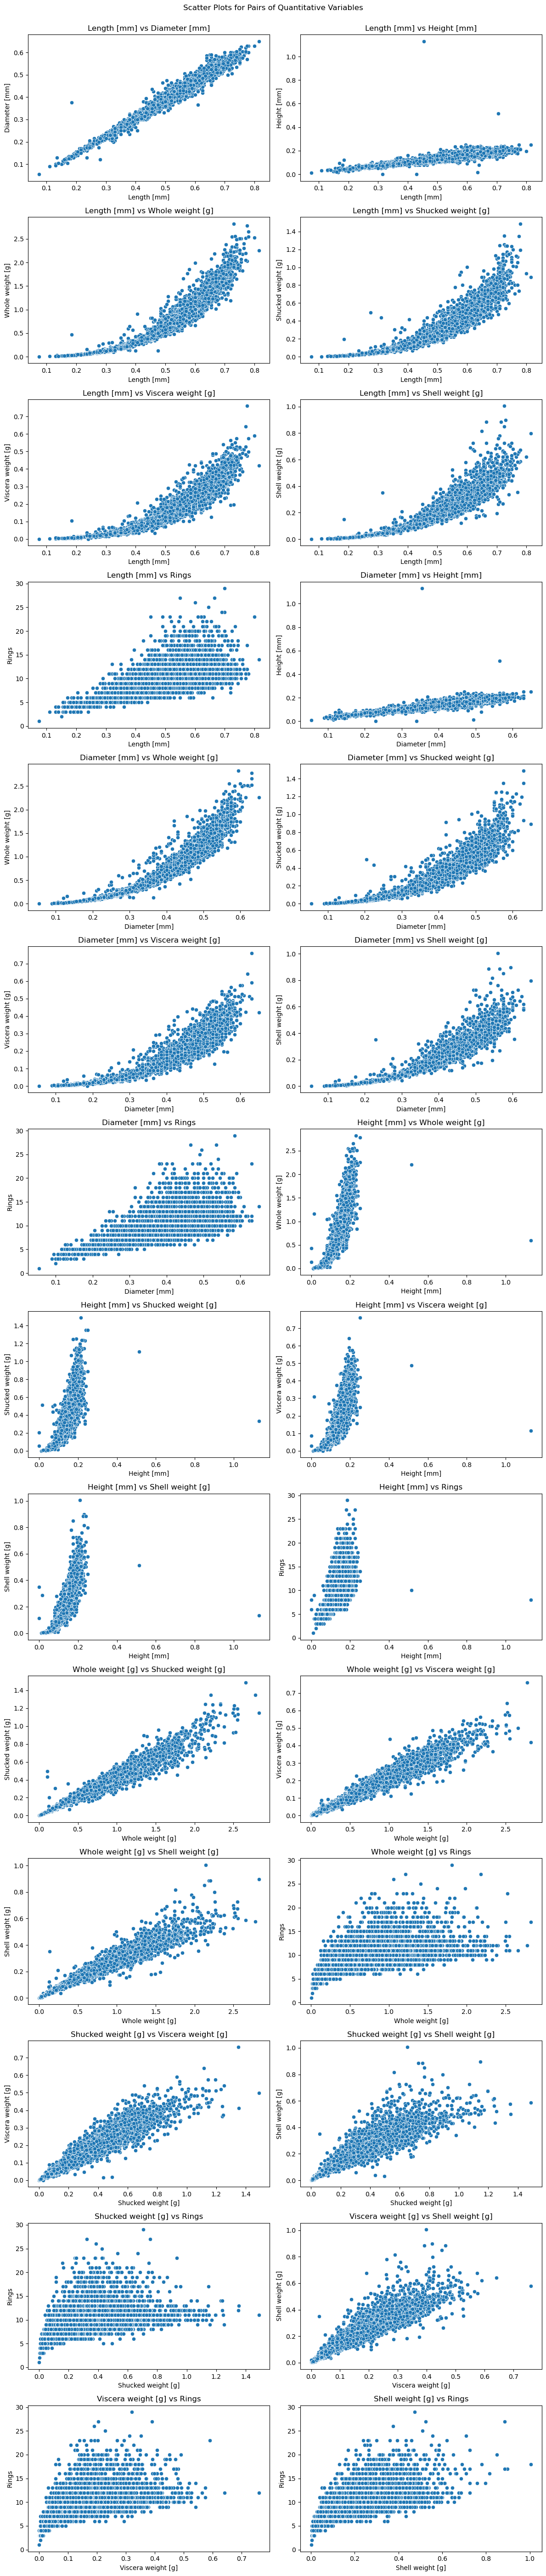

In [7]:
quantitative_data = data.drop('Sex', axis=1)

num_vars = len(quantitative_data.columns)

fig, axes = plt.subplots(14, 2, figsize=(12, 56))
fig.suptitle('Scatter Plots for Pairs of Quantitative Variables', y=1)

plot_number = 0
for i in range(num_vars):
    for j in range(i + 1, num_vars):
        x_var = quantitative_data.columns[i]
        y_var = quantitative_data.columns[j]

        sns.scatterplot(data, x=x_var, y=y_var, ax=axes[plot_number // 2, plot_number % 2])
        axes[plot_number // 2, plot_number % 2].set_title(f'{x_var} vs {y_var}')
        plot_number += 1      

plt.tight_layout()
plt.show()

Zad6

In [8]:
correlation_matrix = data.drop(['Sex'], axis=1).corr()
correlation_matrix

,Length [mm],Diameter [mm],Height [mm],Whole weight [g],Shucked weight [g],Viscera weight [g],Shell weight [g],Rings
Length [mm],1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter [mm],0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height [mm],0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight [g],0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight [g],0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight [g],0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight [g],0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Zad7

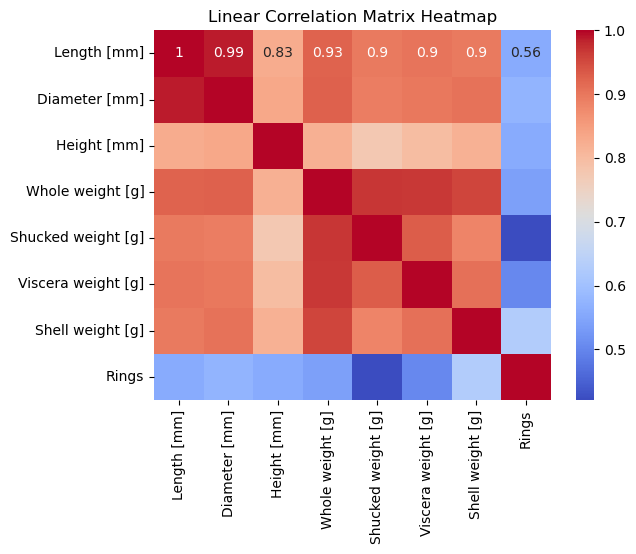

In [9]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Linear Correlation Matrix Heatmap')
plt.show()

Zad8

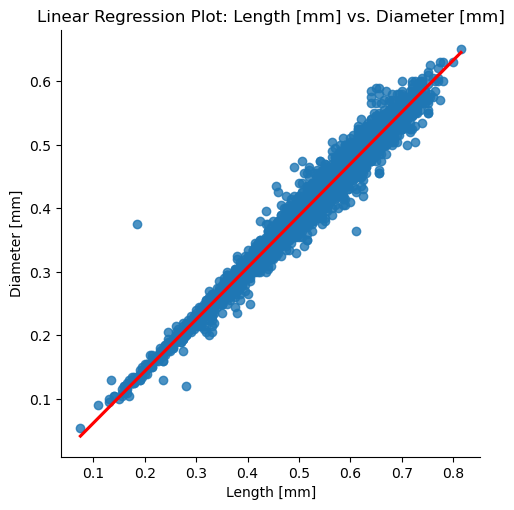

In [10]:
x_variable = 'Length [mm]'
y_variable = 'Diameter [mm]'

# Create a linear regression plot
sns.lmplot(x=x_variable, y=y_variable, data=data, line_kws={'color': 'red'})
plt.title(f'Linear Regression Plot: {x_variable} vs. {y_variable}')
plt.show()